## Tensor

### A tensor is a multidimensional array optimized to work with GPU (i.e., it is much more efficient than NumPy arrays). We can use it to represent image sets, multi-channel images, kernels weights, etc. -- e.g., let's create a tensor from an image.

In [1]:
#import package to manipulate and display images
from skimage import io
import matplotlib.pyplot as plt

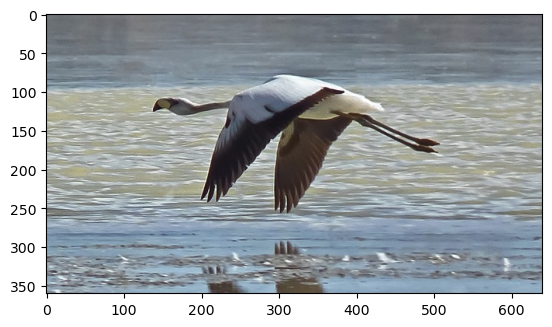

In [26]:
#load image and display it
input_image = io.imread("./images/bird.png")
plt.imshow(input_image)
plt.show()

### Our image is already a multidimensional NumPy array.

In [3]:
#image size: number of rows (y dim., height), number of ncolumns (x dim., width), number of channels (depth)
print(input_image.shape, type(input_image))

(360, 640, 3) <class 'numpy.ndarray'>


### It can be easily transformed into a pytorch tensor.

In [4]:
#import pytorch
import torch

tmp_image = torch.tensor(input_image)
print(tmp_image.shape, type(tmp_image))

torch.Size([360, 640, 3]) <class 'torch.Tensor'>


In [5]:
print(tmp_image)

tensor([[[110, 115, 119],
         [110, 115, 119],
         [111, 116, 120],
         ...,
         [115, 118, 125],
         [114, 117, 124],
         [116, 119, 126]],

        [[109, 114, 118],
         [109, 114, 118],
         [109, 114, 118],
         ...,
         [111, 114, 121],
         [113, 116, 123],
         [115, 118, 125]],

        [[111, 116, 120],
         [111, 116, 120],
         [112, 117, 121],
         ...,
         [108, 111, 118],
         [110, 113, 120],
         [111, 114, 121]],

        ...,

        [[133, 149, 162],
         [127, 143, 156],
         [138, 152, 165],
         ...,
         [145, 172, 191],
         [148, 175, 194],
         [139, 166, 185]],

        [[119, 133, 146],
         [124, 138, 151],
         [114, 126, 140],
         ...,
         [145, 172, 191],
         [152, 179, 198],
         [142, 169, 188]],

        [[149, 163, 176],
         [150, 164, 177],
         [149, 161, 175],
         ...,
         [143, 170, 189],
        

### However, to use it in pytorch, you must place the number of channels before the numbers of rows and columns. Image tensors must be stored as (nchannels, nrows, ncols) = (nchannels, height, width) 

In [6]:
image = tmp_image.permute(2,0,1) # same as tmp_image.transpose(1, 2).transpose(0, 1) 
print(image.shape)

torch.Size([3, 360, 640])


### We can also represent a kernel $K = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$ as a pytorch tensor.

In [7]:
Sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).float()
print(Sobel_x.shape)
print(Sobel_x)

torch.Size([3, 3])
tensor([[-1.,  0.,  1.],
        [-2.,  0.,  2.],
        [-1.,  0.,  1.]])


### Tensors can also be initialized as we do with NumPy arrays. They have many operations in common.

In [8]:
x = torch.zeros((3,3))
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [9]:
x = torch.ones((3,3))
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [10]:
x = torch.randn((3,3)) # random numbers with normal distribution with mean 0 and stdev 1
y = torch.rand((3,3))  # random numbers with uniform distribution in [0,1]
print(x)
print(y)

tensor([[ 0.3641, -0.6262,  1.0913],
        [-0.6896,  1.0638,  0.3937],
        [ 0.5409,  0.6860, -1.5826]])
tensor([[0.3995, 0.8769, 0.0720],
        [0.1714, 0.3441, 0.6732],
        [0.4185, 0.2191, 0.0197]])


In [11]:
y = torch.randint(low=100, high=200, size=(5,4)) # random integer numbers in [100,199]
print(y)

tensor([[131, 105, 103, 169],
        [103, 148, 127, 139],
        [121, 111, 105, 149],
        [132, 137, 145, 190],
        [148, 122, 196, 150]])


### Some examples of operations with tensors

In [12]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
y = x * 10
print(y)
z = x + 10 # x.add(10)
print(z)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[10, 20, 30],
        [40, 50, 60]])
tensor([[11, 12, 13],
        [14, 15, 16]])


In [13]:
# reshaping
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
print(x.shape)
x = x.reshape((3,2)) # Note that, this is NOT the same as x.transpose(0,1)
print(x.shape)
print(x)
x = x.reshape(-1)
print(x.shape)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


In [14]:
# squeezing and unsqueezing

x = torch.randn((4,4))
print("A tensor of size {} x {}".format(x.shape[0],x.shape[1]))
print(x)

y = x.unsqueeze(0) # It adds a new axis 0 of size one. It could also be axis 1 or 2. 
print("By adding axis=0, we have a tensor of size {} x {} x {}".format(y.shape[0],y.shape[1],y.shape[2]))
print(y)

x = y.squeeze(0) # It removes axis 0 if its size is one
print("By removing axis=0, we have a tensor of size {} x {}".format(x.shape[0],x.shape[1]))
print(x)

x = torch.randn((4,1,4,1,1))
print("A tensor with size {} x {} x {} x {} x {}".format(x.shape[0],x.shape[1],x.shape[2],x.shape[3],x.shape[4]))
print(x)

y = x.squeeze(3) # It removes axis 3 if its size is one
print("By removing axis=3, we have a tensor of size {} x {} x {} x {}".format(y.shape[0],y.shape[1],y.shape[2],y.shape[3]))
print(y)

y = x.squeeze() # It removes all axes of size one
print("By removing all axes of size one, we have a tensor of size {} x {}".format(y.shape[0],y.shape[1]))
print(y)


A tensor of size 4 x 4
tensor([[-0.6534,  0.3913, -0.3160,  0.7462],
        [ 1.7173,  0.5687, -0.0307,  0.7476],
        [-0.4673,  1.2293,  0.5494, -0.6524],
        [ 2.1934,  0.4992,  0.1572, -0.4086]])
By adding axis=0, we have a tensor of size 1 x 4 x 4
tensor([[[-0.6534,  0.3913, -0.3160,  0.7462],
         [ 1.7173,  0.5687, -0.0307,  0.7476],
         [-0.4673,  1.2293,  0.5494, -0.6524],
         [ 2.1934,  0.4992,  0.1572, -0.4086]]])
By removing axis=0, we have a tensor of size 4 x 4
tensor([[-0.6534,  0.3913, -0.3160,  0.7462],
        [ 1.7173,  0.5687, -0.0307,  0.7476],
        [-0.4673,  1.2293,  0.5494, -0.6524],
        [ 2.1934,  0.4992,  0.1572, -0.4086]])
A tensor with size 4 x 1 x 4 x 1 x 1
tensor([[[[[ 1.8108]],

          [[ 0.3285]],

          [[ 0.1680]],

          [[ 0.5238]]]],



        [[[[-0.4657]],

          [[-0.3732]],

          [[ 0.2313]],

          [[-2.2000]]]],



        [[[[-0.9002]],

          [[-1.2795]],

          [[ 0.7029]],

    

### Inner product, matrix multiplication, and concatenation

In [15]:
x = torch.tensor([1, 1, 0])
y = torch.tensor([1, 0, 1])
print("Inner product:")
print("<{},{}>={}".format(x,y,x.dot(y)))
print()

print("Matrix multiplication:")
x = torch.tensor([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
y = torch.tensor([1, 1, 1])
print(x, "x", y,"=",y.matmul(x)) # The same as y@x
print()

print("Concatenation:")
x = torch.arange(9)
print("x = ",x)
y = x.reshape((3,3))
print("y = ", y, "after reshaping x as a 3 x 3 matrix")
z = torch.cat([y,y], axis=0)
print("z = ", z, "after concatenating y with y along axis 0")
z = torch.cat([y,y], axis=1)
print("z = ", z, "after concatenating y with y along axis 1")

Inner product:
<tensor([1, 1, 0]),tensor([1, 0, 1])>=1

Matrix multiplication:
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]) x tensor([1, 1, 1]) = tensor([3, 6, 9])

Concatenation:
x =  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
y =  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) after reshaping x as a 3 x 3 matrix
z =  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) after concatenating y with y along axis 0
z =  tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5],
        [6, 7, 8, 6, 7, 8]]) after concatenating y with y along axis 1


### A very important feature is that tensors come with a built-in functionality to calculate gradients

In [16]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print("x = ", x)

x =  tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


### Suppose we calculate $ y = \sum_{i=1}^{4} x^2_i $ whose derivative $\frac{\partial y}{\partial x} = 2 \sum_{i=1}^{4} x_i$. The gradient can be calculated by calling y.backward() followed by x.grad.

In [17]:
y = x.pow(2).sum()
print("y = x.pow(2).sum() =", y)
y.backward()
print("x.grad = ", x.grad)
print("z = x.grad.sum() = ", x.grad.sum())

y = x.pow(2).sum() = tensor(7., grad_fn=<SumBackward0>)
x.grad =  tensor([[ 4., -2.],
        [ 2.,  2.]])
z = x.grad.sum() =  tensor(6.)


### A simple example of backpropagation using tensors

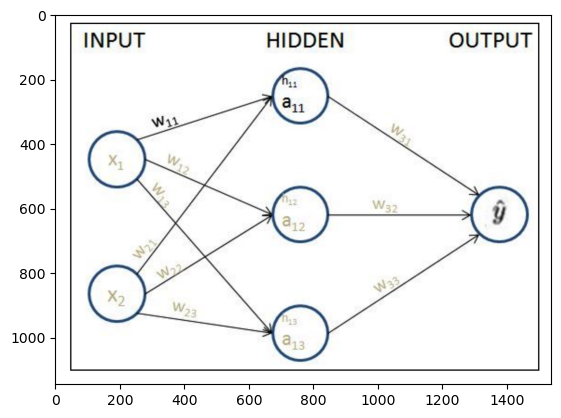

In [18]:
import numpy as np 
from copy import deepcopy
import matplotlib.image as mpimg

img = mpimg.imread('./figs/Simple_NN.png')
imgplot = plt.imshow(img)
plt.show()
x = np.array([[1,1]]) # input of the network
y = np.array([[0]])   # desired output
x, y = [torch.tensor(i).float() for i in [x,y]]

### Feed forward and update weights using auto gradient

In [19]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = torch.matmul(inputs,weights[0])+ weights[1] # hidden layer: inner product with weight vectors + bias
    hidden = 1/(1+torch.exp(-pre_hidden)) # sigmoid activation function
    out = torch.matmul(hidden, weights[2]) + weights[3] # last layer: inner product with the weight vector + bias
    mean_squared_error = torch.mean(torch.square(out - outputs)) # loss: mean square error
    return mean_squared_error

In [20]:
def update_weights(inputs, outputs, weights, lr):
    '''Updates the weights and bias using auto gradient'''        
    original_loss    = feed_forward(inputs, outputs, weights) # forward pass
    original_loss.backward() # compute gradients
    updated_weights  = [w - lr*w.grad for w in weights] # update weights based on the computed gradients
    updated_weights  = [torch.clone(i).detach().requires_grad_(True) for i in updated_weights]  # rebuild the weight tensor list
    return updated_weights, original_loss

### Random weight initialization

In [21]:
# W stores the transposed weight matrices (.T) of the hidden and decision layers as well as 
# the three biases of the hidden layer and one bias of the decision layer. 
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

W = [torch.tensor(i, requires_grad=True) for i in W]

### Train the network

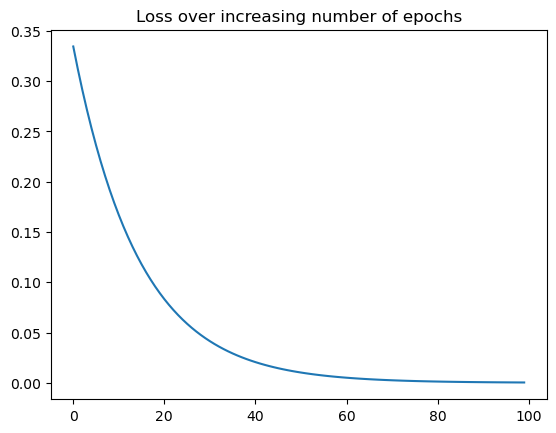

In [22]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss.detach().cpu())  
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.show()

### Present the final weights and bias of all layers as used by the NN 

In [23]:
print("W = ", W)

W =  [tensor([[ 0.0142, -0.5908, -0.2755],
        [ 0.3988, -0.5292,  0.1864]], requires_grad=True), tensor([ 0.0055,  0.5519, -0.0660], requires_grad=True), tensor([[ 0.3475],
        [-0.0553],
        [ 0.0376]], requires_grad=True), tensor([-0.2244], requires_grad=True)]


### Test the NN

In [24]:
pre_hidden = torch.matmul(x,W[0])+ W[1]
hidden     = 1/(1+torch.exp(-pre_hidden))
out        = torch.matmul(hidden, W[2]) + W[3] 

In [25]:
print(out)

tensor([[-0.0174]], grad_fn=<AddBackward0>)
